In [4]:
import pandas as pd
import numpy as np

(1797, 64)


<Figure size 432x288 with 0 Axes>

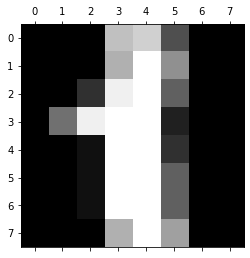

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1])
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X = X_scale.fit_transform(digits.data)
X[0,:]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

In [7]:
from sklearn.model_selection import train_test_split
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [13]:
X_train.shape

(1078, 64)

In [8]:
X_train

array([[ 0.        , -0.33501649, -1.09493684, ...,  1.22664392,
         1.6951369 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.39616473,
         0.71700059, -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ..., -0.97712664,
        -0.5056698 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.46382335, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.88456568, ..., -0.80760583,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  0.37766131, ..., -0.80760583,
        -0.5056698 , -0.19600752]])

In [9]:
# преобразование ответов в вектора из 10 компонент
import numpy as np
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

y_train_vect = convert_y_to_vect(y_train)
y_test_vect = convert_y_to_vect(y_test)
y_train[6], y_train_vect[6]


(2, array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]))

In [23]:
y_train_vect

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [10]:
# определяем структуру слоев:
nn_structure = [64, 30, 10]

In [11]:
# определяем функцию активации и ее производную
def f(x):
    return 1 / (1 + np.exp(-x))

def f_deriv(x):
    return f(x) * (1 - f(x))

In [16]:
import numpy.random as r
def setup_and_init_weights(nn_structure):
    W = {}
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1]))
        b[l] = r.random_sample((nn_structure[l],))
    return W, b
W , b = setup_and_init_weights(nn_structure)

In [17]:
def init_cum_values(nn_structure):
    cum_W = {}
    cum_b = {}
    for l in range(1, len(nn_structure)):
        cum_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        cum_b[l] = np.zeros((nn_structure[l],))
    return cum_W, cum_b
cum_W , cum_b = init_tri_values(nn_structure)

In [20]:
f(X_train[0].dot(W[1].transpose()))

array([0.21854058, 0.0089282 , 0.77111891, 0.00911017, 0.10146783,
       0.07151888, 0.00950118, 0.04488723, 0.261698  , 0.20120488,
       0.09522809, 0.26818935, 0.04323637, 0.01386036, 0.15584776,
       0.13986034, 0.02353962, 0.0062206 , 0.03660535, 0.04122007,
       0.37286549, 0.14869098, 0.18434968, 0.20746824, 0.28171203,
       0.10732302, 0.0019345 , 0.38200058, 0.00243422, 0.05973066])

In [22]:
f(f(X_train[0].dot(W[1].transpose())).dot(W[2].transpose()))

array([0.90477223, 0.94172687, 0.90276557, 0.88374708, 0.93302805,
       0.92183654, 0.87205032, 0.91191675, 0.87444248, 0.90902401])

In [25]:
def outter_delta(y, h_out, z_out):
    return -(y-h_out) * f_deriv(z_out)

def hidden_delta(delta_plus_1, w_l, z_l):
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

In [30]:
def forward_way(nn_structure, x, w, b):
    for i in range(1, len(nn_structure)):
        if i == 1:
            res = x
        res = f(np.dot(res, w[i].transpose()) + b[i].transpose())
    return res


In [ ]:
def back_way(res, y, w, b):
    for i in range(1, len(nn_structure)):
        j = len(nn_structure)-i
        cum_W = 
        

In [32]:
test = forward_way(nn_structure, X_train, W, b)

In [36]:
y_train_vect - test

array([[-9.75706112e-01, -9.84558325e-01, -9.85681871e-01, ...,
        -9.82668067e-01, -9.71402117e-01, -9.60974736e-01],
       [-7.60606238e-01, -7.66311963e-01, -8.56998473e-01, ...,
        -7.89183783e-01, -7.80714786e-01, -6.49502743e-01],
       [-9.99981812e-01, -9.99997948e-01, -9.99997016e-01, ...,
        -9.99994634e-01, -9.99997748e-01, -9.99991625e-01],
       ...,
       [-6.46198423e-01, -5.86079040e-01, -7.50034402e-01, ...,
         2.98107362e-01, -7.02657347e-01, -5.44742096e-01],
       [-9.99395119e-01, -9.98974018e-01, -9.99675110e-01, ...,
        -9.99683416e-01,  3.29856871e-04, -9.98789772e-01],
       [ 3.50897121e-07, -9.99999899e-01, -9.99999944e-01, ...,
        -9.99999788e-01, -9.99999731e-01, -9.99999453e-01]])

In [40]:
len(nn_structure)

3